# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
# Carga el archivo desde los archivos del cuaderno
df = pd.read_csv('dataset_banco_clean.csv')

# Haz algo con el DataFrame, por ejemplo, muestra las primeras filas
print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no   2143.0     yes   no   
1   44    technician   single  secondary      no     29.0     yes   no   
2   33  entrepreneur  married  secondary      no      2.0     yes  yes   
3   47   blue-collar  married    unknown      no   1506.0     yes   no   
4   33       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may     261.0         1   -1.0         0  unknown  no  
1  unknown    5   may     151.0         1   -1.0         0  unknown  no  
2  unknown    5   may      76.0         1   -1.0         0  unknown  no  
3  unknown    5   may      92.0         1   -1.0         0  unknown  no  
4  unknown    5   may     198.0         1   -1.0         0  unknown  no  


In [ ]:
print(df.shape)
df.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

## Encuentro que las variables más útiles para identificar un cliente son a priori las siguientes:

"balance": El saldo promedio anual en euros puede ser un indicador de la capacidad financiera del cliente, lo que podría influir en su disposición a invertir en un certificado de depósito a término.

"age": La edad puede ser relevante, ya que las personas en ciertos grupos de edad pueden estar más inclinadas a invertir en productos financieros a largo plazo.

"job": El tipo de trabajo puede proporcionar información sobre el nivel de ingresos, estabilidad financiera y disposición para invertir.

"marital": El estado civil podría influir en las decisiones financieras, ya que las personas casadas pueden tener responsabilidades financieras diferentes a las de los solteros o divorciados.

"education": El nivel educativo puede estar relacionado con la disposición a invertir y comprender los productos financieros.

"default": Si el cliente ha incumplido previamente sus obligaciones financieras, podría indicar un mayor riesgo y una menor probabilidad de conversión.

"housing": La posesión de una hipoteca podría indicar estabilidad financiera o compromisos financieros adicionales que podrían afectar la decisión de inversión.

# Vamos a comenzar analizado individualmente cada variable de las escogidas:

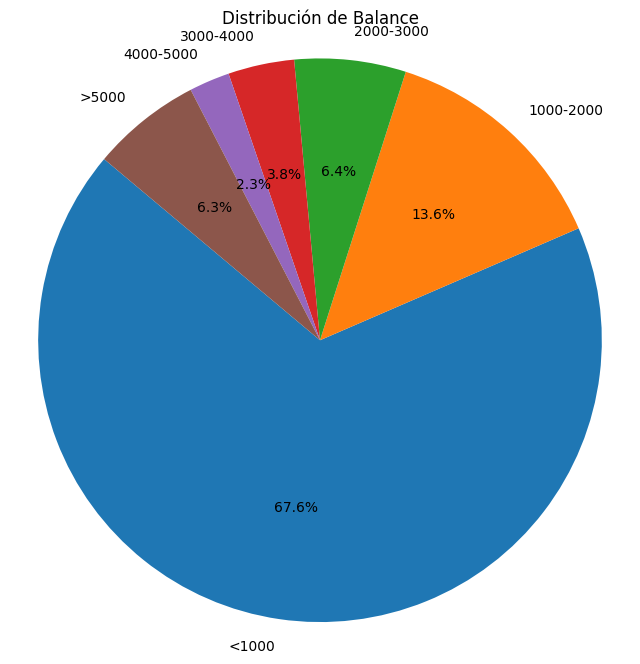

In [ ]:
import matplotlib.pyplot as plt

# Calcular los rangos para los segmentos de la tarta
balance_ranges = ['<1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '>5000']
balance_counts = [((df['balance'] < 1000).sum()),
                  (((df['balance'] >= 1000) & (df['balance'] < 2000)).sum()),
                  (((df['balance'] >= 2000) & (df['balance'] < 3000)).sum()),
                  (((df['balance'] >= 3000) & (df['balance'] < 4000)).sum()),
                  (((df['balance'] >= 4000) & (df['balance'] < 5000)).sum()),
                  ((df['balance'] >= 5000).sum())]

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(balance_counts, labels=balance_ranges, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Balance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Calcular el ratio de conversión para cada intervalo de balance
balance_conversion_ratio = [subscriptions / total_clients if total_clients > 0 else 0
                            for subscriptions, total_clients in zip(balance_subscriptions, balance_total_clients)]

# Mostrar el ratio de conversión para cada intervalo de balance
for balance_range, conversion_ratio in zip(balance_ranges, balance_conversion_ratio):
    print(f'Intervalo de Balance: {balance_range}, Ratio de Conversión: {conversion_ratio:.2%}')


Intervalo de Balance: <1000, Ratio de Conversión: 9.93%
Intervalo de Balance: 1000-2000, Ratio de Conversión: 13.74%
Intervalo de Balance: 2000-3000, Ratio de Conversión: 17.04%
Intervalo de Balance: 3000-4000, Ratio de Conversión: 17.38%
Intervalo de Balance: 4000-5000, Ratio de Conversión: 16.83%
Intervalo de Balance: >5000, Ratio de Conversión: 15.49%


El balance de 2/3 de nuestra muestra es menor a 1.000 EUR

## Vamos ahora a ver los rangos de edades de nuestro dataset

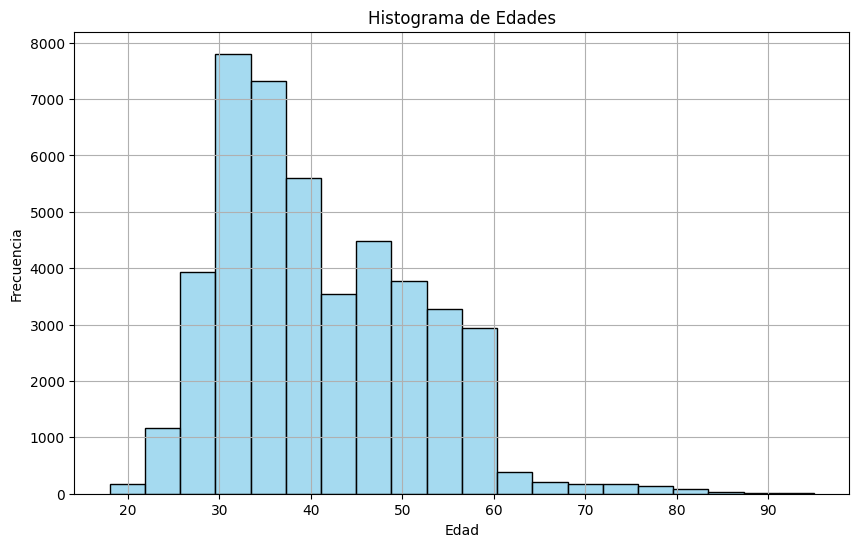

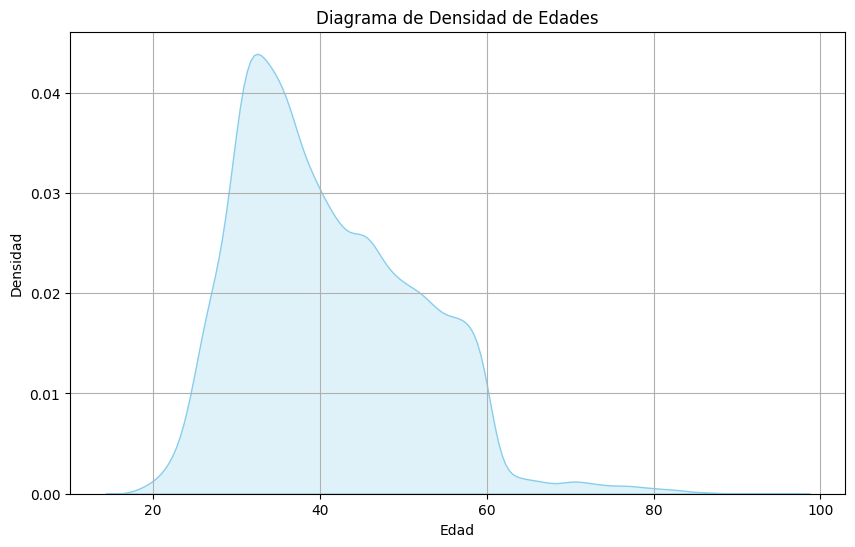

In [ ]:
import seaborn as sns

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Diagrama de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], color='skyblue', fill=True)
plt.title('Diagrama de Densidad de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


La mayoría de nuestros registros se encuentran entre los 30 y los 40 años

### Vamos a ver ahora el ratio de conversion por edad, dividiendo esta variable en inetervalos de 5 años para verlo mejor

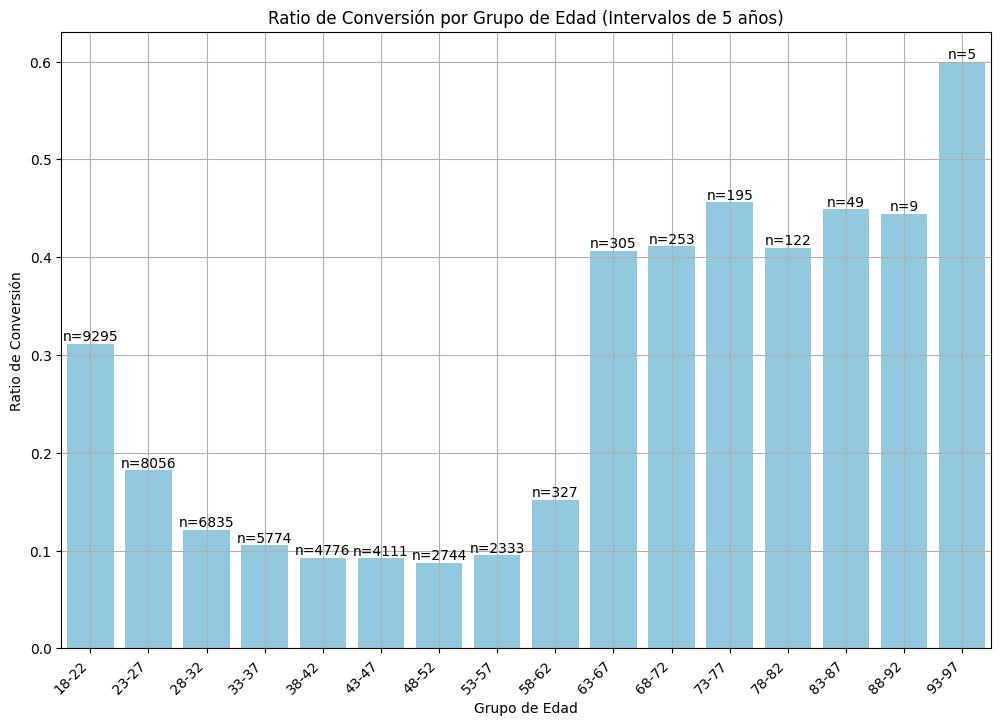

In [ ]:
import numpy as np

# Crear intervalos de edad de 5 años
age_bins = np.arange(18, 100, 5)
age_labels = [f'{i}-{i+4}' for i in age_bins[:-1]]

# Asignar cada edad a su intervalo correspondiente
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calcular la tabla de contingencia de age_group y y
age_group_y_cross = pd.crosstab(df['age_group'], df['y'])

# Calcular el tamaño de la muestra para cada grupo de edad
age_group_sizes = df['age_group'].value_counts()

# Calcular el número total de registros para cada grupo de edad
total_records = age_group_y_cross.sum(axis=1)

# Calcular el ratio de conversión (yes sobre el total de registros) para cada grupo de edad
conversion_ratio_total = age_group_y_cross['yes'] / total_records

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=age_group_y_cross.index, y=conversion_ratio_total, color='skyblue')
plt.title('Ratio de Conversión por Grupo de Edad (Intervalos de 5 años)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Ratio de Conversión')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(True)

# Mostrar el número total de registros en las etiquetas de las barras
for i, (bar, size) in enumerate(zip(bars.patches, age_group_sizes)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={size}',
             ha='center', va='bottom')

plt.show()


### Vemos que a partir de los 63-67 años, los ratios son muy altos, pero las muestras muy pequeñas, por lo que vamos a limitarlo a >300 muestras para tener una imagen más realista.
## Además situamos una linea de corte en el 15% de ratio de conversión para ver mas claro el perfil de clientes.

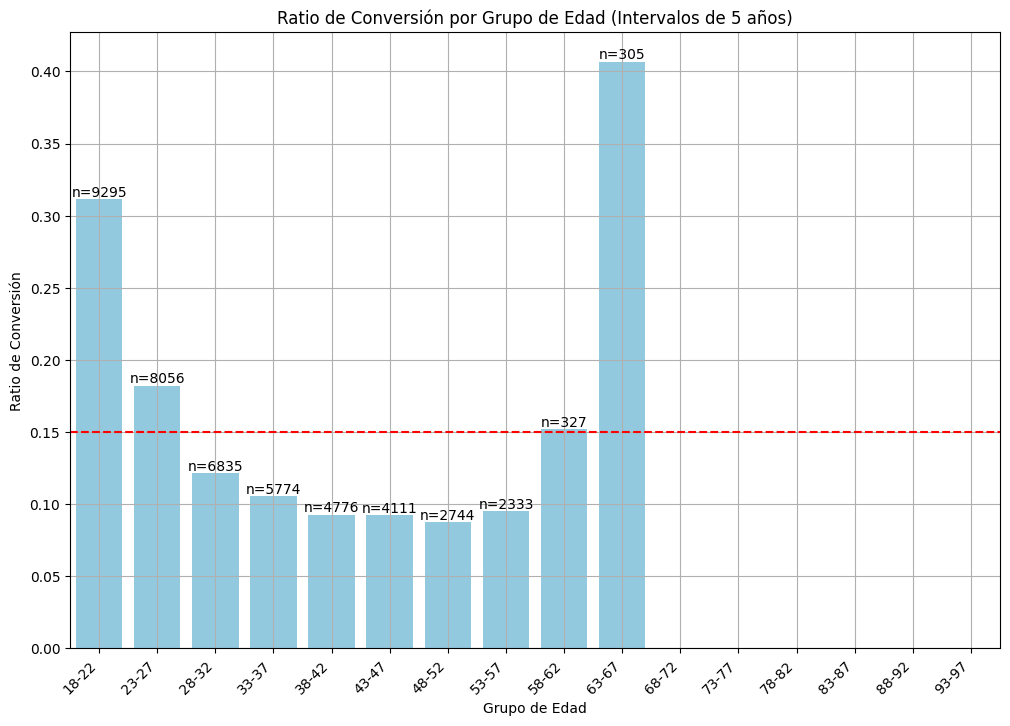

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'df' con tus datos

# Crear intervalos de edad de 5 años
age_bins = np.arange(18, 100, 5)
age_labels = [f'{i}-{i+4}' for i in age_bins[:-1]]

# Asignar cada edad a su intervalo correspondiente
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calcular la tabla de contingencia de age_group y y
age_group_y_cross = pd.crosstab(df['age_group'], df['y'])

# Calcular el tamaño de la muestra para cada grupo de edad
age_group_sizes = df['age_group'].value_counts()

# Filtrar los grupos de edad con más de 300 registros
age_group_sizes_filtered = age_group_sizes[age_group_sizes > 300]
age_group_y_cross_filtered = age_group_y_cross.loc[age_group_sizes_filtered.index]

# Calcular el número total de registros para cada grupo de edad filtrado
total_records_filtered = age_group_y_cross_filtered.sum(axis=1)

# Calcular el ratio de conversión (yes sobre el total de registros) para cada grupo de edad filtrado
conversion_ratio_total_filtered = age_group_y_cross_filtered['yes'] / total_records_filtered

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=age_group_y_cross_filtered.index, y=conversion_ratio_total_filtered, color='skyblue')
plt.title('Ratio de Conversión por Grupo de Edad (Intervalos de 5 años)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Ratio de Conversión')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(True)

# Mostrar el número total de registros en las etiquetas de las barras
for i, (bar, size) in enumerate(zip(bars.patches, age_group_sizes_filtered)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={size}',
             ha='center', va='bottom')

# Agregar línea horizontal en Y = 0.15
plt.axhline(y=0.15, color='r', linestyle='--')

plt.show()


<Figure size 1200x800 with 0 Axes>

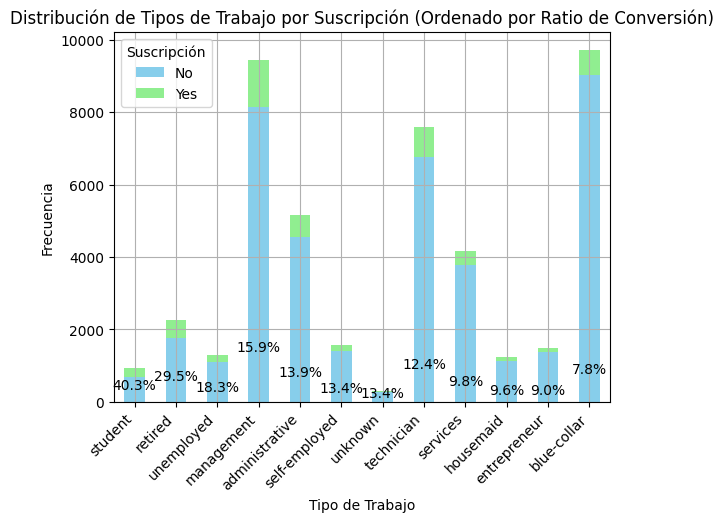

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la tabla de contingencia de job y y
job_y_cross = pd.crosstab(df['job'], df['y'])

# Calcular el ratio de conversión (yes sobre no) para cada tipo de trabajo
job_y_cross['Conversion_Ratio'] = job_y_cross['yes'] / job_y_cross['no']

# Ordenar los tipos de trabajo por el ratio de conversión
job_y_cross_sorted = job_y_cross.sort_values(by='Conversion_Ratio', ascending=False)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
job_y_cross_sorted[['no', 'yes']].plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title('Distribución de Tipos de Trabajo por Suscripción (Ordenado por Ratio de Conversión)')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Suscripción', labels=['No', 'Yes'])
plt.grid(True)

# Agregar porcentaje de conversión en la parte superior de cada barra
for i in range(len(job_y_cross_sorted)):
    plt.text(i, job_y_cross_sorted.iloc[i]['yes'],
             '{:.1%}'.format(job_y_cross_sorted.iloc[i]['Conversion_Ratio']),
             ha='center', va='bottom')

plt.show()


<Figure size 1200x800 with 0 Axes>

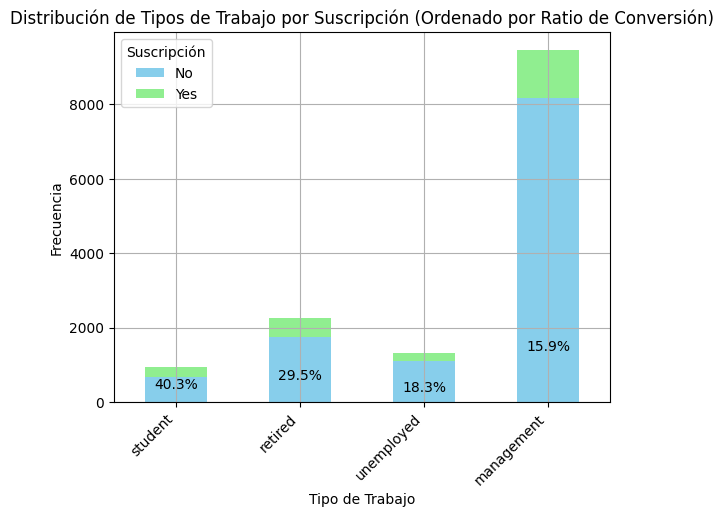

In [ ]:
# Filtrar las categorías con un ratio de conversión mayor al 15%
job_y_cross_sorted_filtered_high_conversion = job_y_cross_sorted_filtered[job_y_cross_sorted_filtered['Conversion_Ratio'] > 0.12]

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
job_y_cross_sorted_filtered_high_conversion[['no', 'yes']].plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title('Distribución de Tipos de Trabajo por Suscripción (Ordenado por Ratio de Conversión)')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Suscripción', labels=['No', 'Yes'])
plt.grid(True)

# Agregar porcentaje de conversión en la parte superior de cada barra
for i in range(len(job_y_cross_sorted_filtered_high_conversion)):
    plt.text(i, job_y_cross_sorted_filtered_high_conversion.iloc[i]['yes'],
             '{:.1%}'.format(job_y_cross_sorted_filtered_high_conversion.iloc[i]['Conversion_Ratio']),
             ha='center', va='bottom')

plt.show()


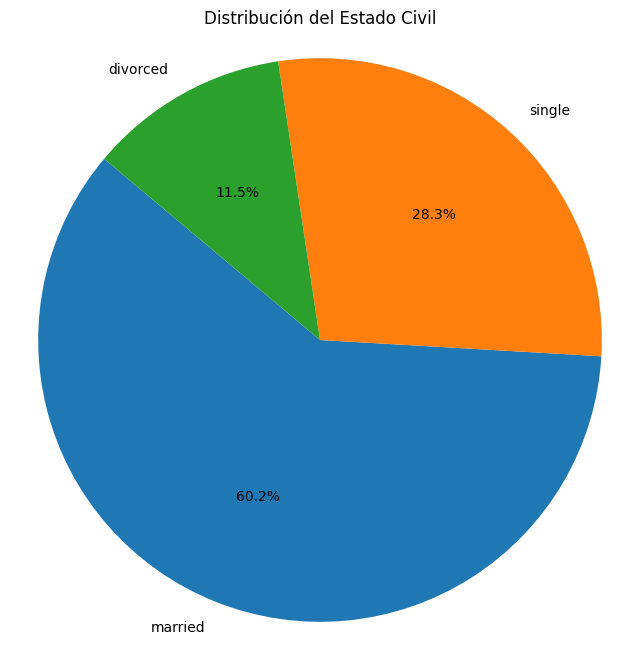

In [ ]:
import matplotlib.pyplot as plt

# Calcular la distribución de la variable "marital"
marital_distribution = df['marital'].value_counts()

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(marital_distribution, labels=marital_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Estado Civil')
plt.axis('equal')  # Aspecto igual para asegurar que la tarta se dibuje como un círculo
plt.show()


<ipython-input-64-4b4ae90d5bd8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_conversion_ratio_sorted.index, y=marital_conversion_ratio_sorted.values, palette='viridis')


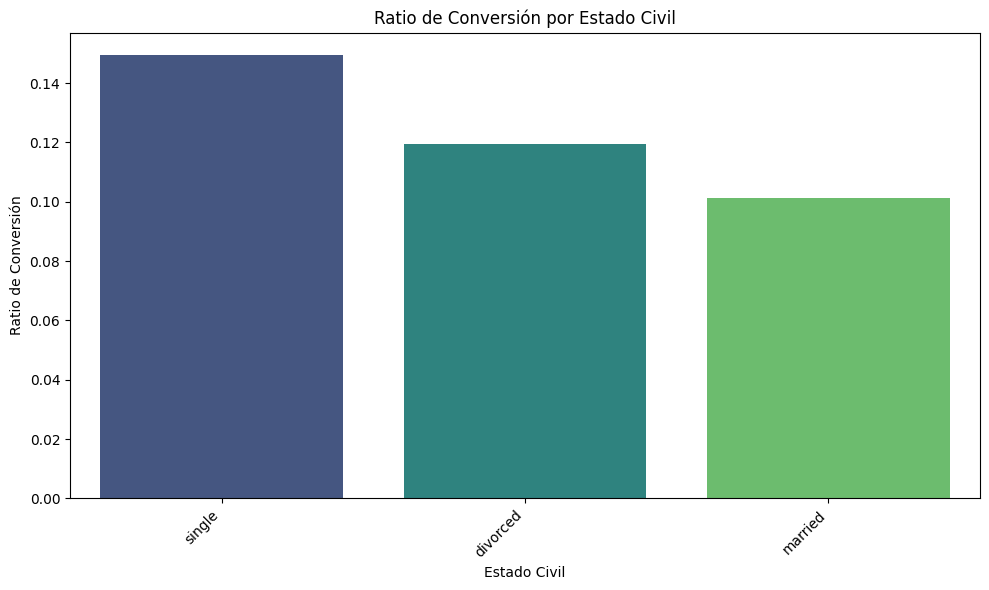

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el número de suscripciones (yes) para cada valor de la variable "marital"
marital_subscription_counts = df.groupby('marital')['y'].value_counts().unstack().fillna(0)
marital_conversion_ratio = marital_subscription_counts['yes'] / marital_subscription_counts.sum(axis=1)

# Ordenar los valores de la variable "marital" por el ratio de conversión
marital_conversion_ratio_sorted = marital_conversion_ratio.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_conversion_ratio_sorted.index, y=marital_conversion_ratio_sorted.values, palette='viridis')
plt.title('Ratio de Conversión por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Ratio de Conversión')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()


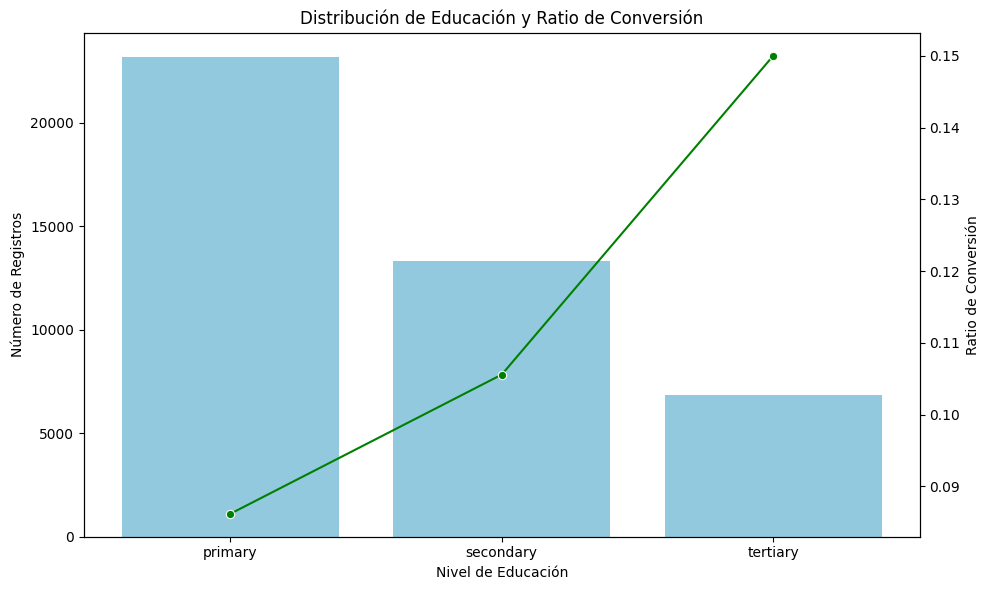

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el valor 'unknown' de la variable "education"
df_filtered = df[df['education'] != 'unknown']

# Calcular el número de veces que se repite cada valor de la variable "education"
education_counts = df_filtered['education'].value_counts()

# Calcular el ratio de conversión para cada valor de la variable "education"
education_conversion_ratio = df_filtered.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

# Crear una figura con dos subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la distribución de "education" como un gráfico de barras en el primer subplot
sns.barplot(x=education_counts.index, y=education_counts.values, ax=ax1, color='skyblue')
ax1.set_title('Distribución de Educación y Ratio de Conversión')
ax1.set_xlabel('Nivel de Educación')
ax1.set_ylabel('Número de Registros')

# Crear el segundo subplot que comparte el mismo eje x que el primer subplot
ax2 = ax1.twinx()

# Graficar el ratio de conversión como una línea en el segundo subplot
sns.lineplot(x=education_conversion_ratio.index, y=education_conversion_ratio.values, marker='o', color='green', ax=ax2)
ax2.set_ylabel('Ratio de Conversión')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


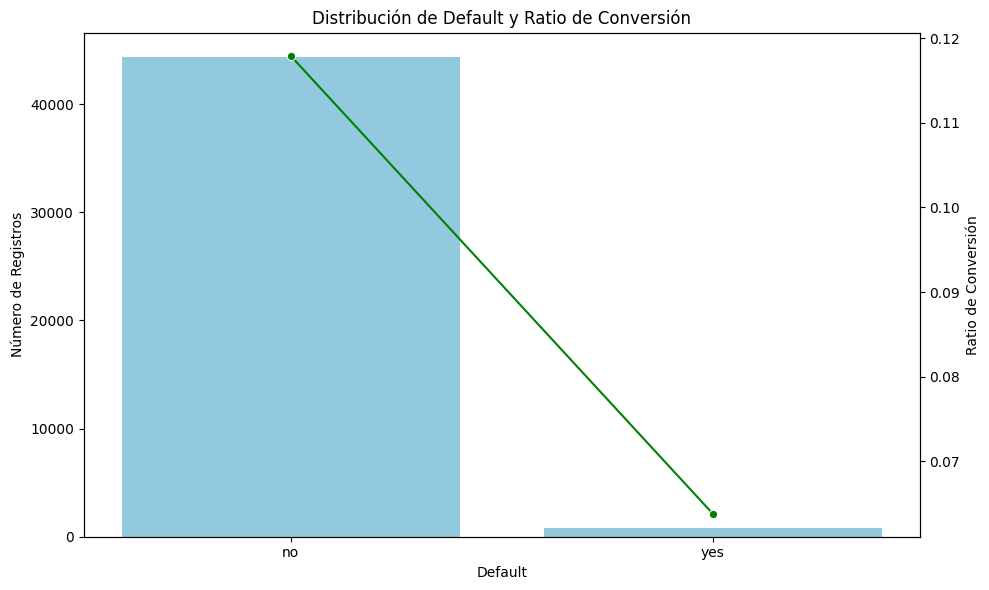

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el número de veces que se repite cada valor de la variable "default"
default_counts = df['default'].value_counts()

# Calcular el ratio de conversión para cada valor de la variable "default"
default_conversion_ratio = df.groupby('default')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

# Crear una figura con dos subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la distribución de "default" como un gráfico de barras en el primer subplot
sns.barplot(x=default_counts.index, y=default_counts.values, ax=ax1, color='skyblue')
ax1.set_title('Distribución de Default y Ratio de Conversión')
ax1.set_xlabel('Default')
ax1.set_ylabel('Número de Registros')

# Crear el segundo subplot que comparte el mismo eje x que el primer subplot
ax2 = ax1.twinx()

# Graficar el ratio de conversión como una línea en el segundo subplot
sns.lineplot(x=default_conversion_ratio.index, y=default_conversion_ratio.values, marker='o', color='green', ax=ax2)
ax2.set_ylabel('Ratio de Conversión')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


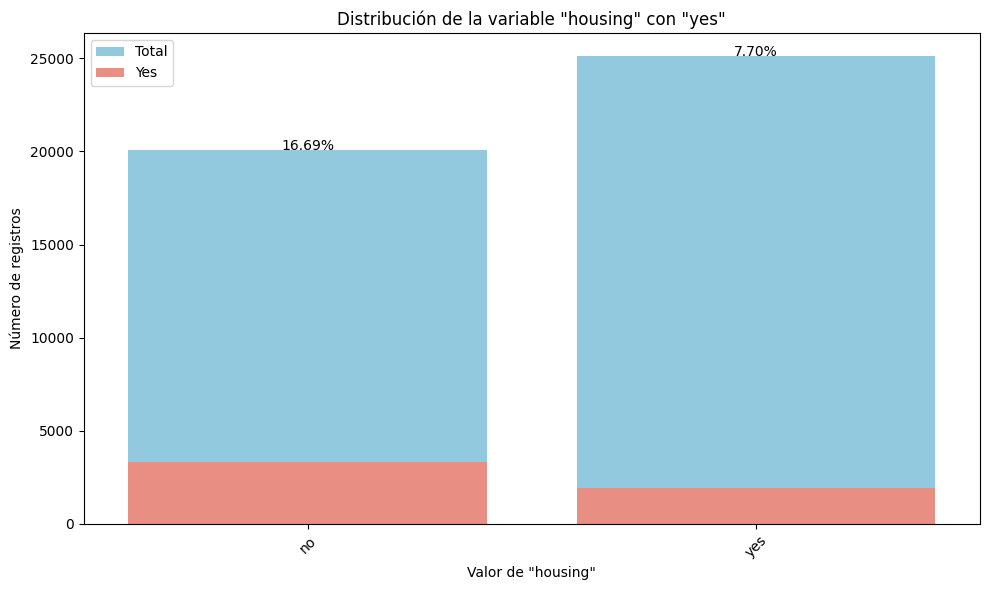

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame que contiene los datos
# y que tiene una columna llamada 'housing'

# Calcula el número total de registros
total_records = len(df)

# Calcula el número de registros para cada valor único en 'housing'
housing_counts = df['housing'].value_counts()

# Calcula el número de registros 'yes' para cada valor de 'housing'
yes_counts = df[df['y'] == 'yes']['housing'].value_counts()

# Calcula el ratio de conversión para cada valor de 'housing'
conversion_ratios = (yes_counts / housing_counts) * 100

# Crea un DataFrame con los recuentos totales, de 'yes' y los ratios de conversión
summary_df = pd.DataFrame({'Total': housing_counts, 'Yes': yes_counts, 'Conversion Ratio (%)': conversion_ratios})

# Graficar usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_df.index, y='Total', data=summary_df, color='skyblue', label='Total')
sns.barplot(x=summary_df.index, y='Yes', data=summary_df, color='salmon', label='Yes')

plt.ylabel('Número de registros')
plt.xlabel('Valor de "housing"')
plt.title('Distribución de la variable "housing" con "yes"')
plt.xticks(rotation=45)

# Agregar etiquetas de ratio de conversión
for i, row in summary_df.iterrows():
    plt.text(i, row['Total'] + 10, f'{row["Conversion Ratio (%)"]:.2f}%', ha='center')

plt.legend()
plt.tight_layout()
plt.show()


# Conclusiones

### Sacamos de nuestro analisis, que nuestro cliente objetivo es:


Edad: de 18 a 27 años / de 58 a 67 años

Ocupación: Estudiante / Retirado / Desempleado / Management

Estado Civil: Soltero o Divorciado

Nivel de educación: Secundaria ó mayoritariamnete Terciaria

NO dejó de pagar obligaciones

NO tiene crédito hipotecario

### Sabiendo esto, tenemos un perfil muy definido de cliente potencial, donde podemos centrar nuestras campañas.
